## Nota bene

In this exercise, you will solve a familiar image classification problem—separating cat images from dog images using an ensemble of stacked models.  
  
The *train_task.zip* archive contains a selection that includes images of cats and dogs (500 images each). The name of each image, for convenience, has the following format: cat/dog.image_number.jpg depending on which animal is present in the image. This sample is used to train the classifier and evaluate it.  
  
The next *test_task.zip* archive is designed to classify new objects after the classifier has been built.  
  
Important! Use the scikit-learn library version==0.23.0, you also need the opencv library  
> !pip install --upgrade pip  
> !pip install imutils  
> !pip install opencv-python  
> !pip install --upgrade scikit-learn==0.23.0  
  
To work with images and obtain their histograms - characteristics of the distribution of image intensity, you can use the following function and the cv2 library:

In [46]:
import cv2

def extract_histogram(imagePath, bins=(8, 8, 8)):
    image = cv2.imread(imagePath)
    hist = cv2.calcHist([image], [0, 1, 2], None, bins, [0, 256, 0, 256, 0, 256])
    cv2.normalize(hist, hist)
    return hist.flatten()

In tasks, use the implementation of algorithms from the sklearn library:

In [47]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

## Task

1. Train basic algorithms on the original dataset:

* Soft-gap classifier with parameters: C = 1.44, random_state = 42, other default parameters;
* Bagging decision trees. Tree parameters: criterion = 'entropy', min_samples_leaf = 10, max_leaf_nodes = 20, random_state = 42, other default parameters. Bagging parameters: n_estimators = 18, random_state = 42;
* Random forest with parameters: n_estimators = 18, criterion = 'entropy', min_samples_leaf = 10, max_leaf_nodes = 20, random_state = 42, other default parameters.

In [48]:
# formation of arrays of features(trainImagesData) and responses(trainY) of the train 
# class "dog" 1
# class "cat" 0

from imutils import paths
import numpy as np

trainImagesPaths = sorted(list(paths.list_images("drive/MyDrive/data/train_data")))
trainImagesData = []
trainY = []

for i in range(len(trainImagesPaths)):
    trainImagesData.append(np.array(extract_histogram(trainImagesPaths[i])))

    if (trainImagesPaths[i].find("cat") == -1):
        trainY.append(1)
    else:
      trainY.append(0)

In [49]:
svc = LinearSVC(C = 1.44, random_state = 42)

bdt = BaggingClassifier(base_estimator = DecisionTreeClassifier(criterion = 'entropy', min_samples_leaf = 10, max_leaf_nodes = 20, random_state = 42), n_estimators = 18, random_state = 42)

rf = RandomForestClassifier(n_estimators = 18, criterion = 'entropy', min_samples_leaf = 10, max_leaf_nodes = 20, random_state = 42)

2. Train the meta-algorithm - logistic regression: solver='lbfgs', random_state = 42, other default parameters. Estimate its accuracy at cv = 2.

In [50]:
ma = LogisticRegression(solver='lbfgs', random_state = 42)

3. Train the stacking model. Use 2-fold (cv = 2) cross-validation to evaluate.

In [51]:
sc = StackingClassifier(estimators = [('svc', svc), ('bdt', bdt), ('rf', rf)], final_estimator = ma, cv = 2).fit(trainImagesData, trainY)

pred = sc.predict(trainImagesData)

In [52]:
from sklearn.metrics import accuracy_score

print(round(accuracy_score(trainY, pred), 2))

0.84


4. Perform a prediction for the images below and determine the probability of class 1 (cat) images using the trained meta-algorithm.

In [57]:
sc.classes_

array([0, 1])

cat.1040.jpg  
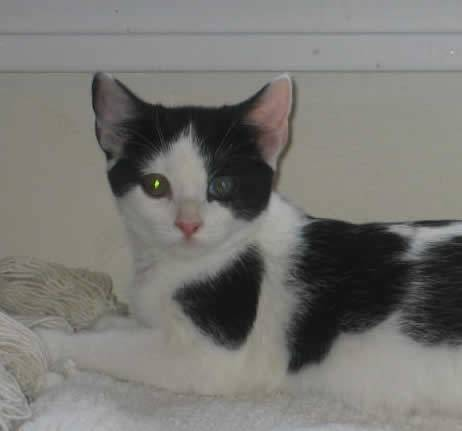

In [60]:
cat1040 = extract_histogram("drive/MyDrive/data/test_data/cat.1040.jpg").reshape(1, -1)
print(round(sc.predict_proba(cat1040)[0][0], 3))

0.701


cat.1015.jpg  
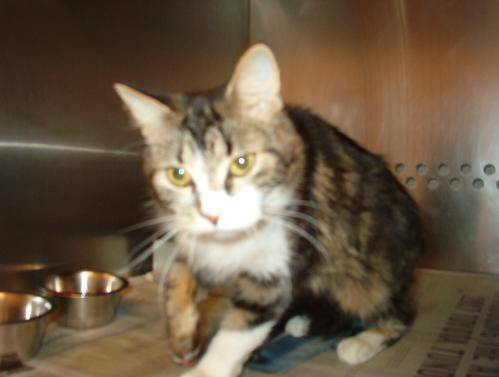

In [62]:
cat1015 = extract_histogram("drive/MyDrive/data/test_data/cat.1015.jpg").reshape(1, -1)
print(round(sc.predict_proba(cat1015)[0][0], 3))

0.624


dog.1022.jpg  
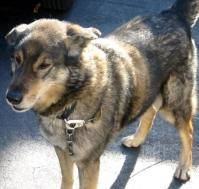

In [63]:
dog1022 = extract_histogram("drive/MyDrive/data/test_data/dog.1022.jpg").reshape(1, -1)
print(round(sc.predict_proba(dog1022)[0][0], 3))

0.552


cat.1022.jpg  
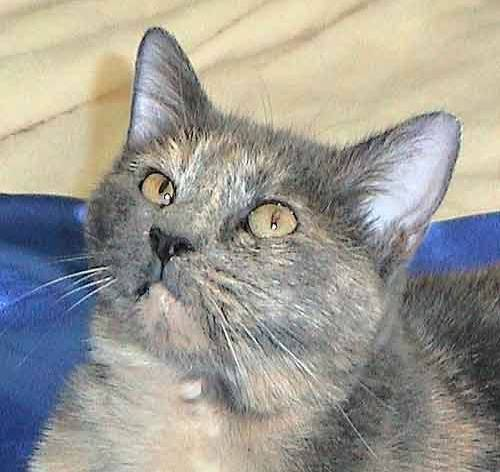

In [64]:
cat1022 = extract_histogram("drive/MyDrive/data/test_data/cat.1022.jpg").reshape(1, -1)
print(round(sc.predict_proba(cat1022)[0][0], 3))

0.539
